## Mathematisches Experimentieren mit „ipython notebook“ 

### Forschendes Lernen in der Sek II 

Dr. Martin Guggisberg <br>
Pädagogische Hochschule FHNW<br>
Basel, Schweiz<br>

<p>50. GDM-Jahrestagung Heidelberg 2016</p>

Ausgehend vom arithmetisch-musikalischem Gruppenspiel Ping-Pong (Cslovjecsek, M., PM 42, 2011) wird in diesem Beitrag aufgezeigt, wie Schülerinnen und Schüler der Sekundarstufe 2 mit Hilfe des Werkzeug „iPython notebook“ einzelne Spielsituationen simulieren können und diese anhand spezieller Visualisierungen in verschiedene Kategorien einteilen können. Die Arbeitsweise der Schülerinnen und Schüler entspricht damit dem aktuellen Trend in der Forschung elektronische Notizbücher zu veröffentlichen.

## Gliederung
 - Elektronische Laborjournale
 - Exemplarisches Beispiel zum arithmetisch-musikalischem Gruppenspiel Ping-Pong

## Experimentieren


```Durch Hypothesen geleitetes, planvolles und kontrolliertes Handeln mit Objekten zum Zweck der Erkenntnisgewinnung durch Beobachtung``` ( Ludwig & Oldenburg 2007)

### Experiment als Methode
- Mathematik zum Anfassen
- zielgerichtetes systematisches Vorgehen

### Mathematisches Experimentieren mit dem PC

A. Engel,Stuttgart : Klett, 1991 
Inhalt: Zahlentheoretische Algorithmen, Wahrscheinlichkeit,Statistik, Kombinatorische Algorithmen

Mit dem Computer experimentieren $\to$ Wissenschaftliches Rechnen

Neue Studiengänge Computational Sciences in  XXX

### Laborjournal

Systematische Aufzeichnung aller inneren und äusseren Paramter,
geometrische Konfiguration, sowie die experimentel ermittelten Ergebnisse.


![lab](images/labbook3.jpg)

### Elektronische Laborjournale

- Automatisierte elektronische Erfassung aller Parameter
- Möglichkeit für manuelle Ergänzungen (Figuren, math. Formeln, Texte)
- Werkzeuge zur Datenvisualisierung

### ipython notebooks 
- Entwickelt seit 2010
- Erweiterung auf weitere Programmiersprachen
- ipython notebook $\to$ __jupyter notebook__
- Einsatz
    - Interaktive Hochschulkursunterlagen 
    - Elektronische Laborjournal und Bücher

### Von Ipython zu Jupyter

![IPython_Jupyter](images/IPython_Jupyter.png)


### Nahtlose Verteilung von Notebooks

- Notebook Gallery [http://nb.bianp.net/sort/views/](http://nb.bianp.net/sort/views/)
- Jupyter Notebook Viewer [http://nbviewer.jupyter.org/](http://nbviewer.jupyter.org/)
<br>

### Freies und direktes Arbeiten in der Cloud

- [https://try.jupyter.org/](https://try.jupyter.org/)
- [https://studio.azureml.net/](https://try.jupyter.org/)

### Potenzial von jupyter notebook für den Schuleinsatz

- 100% open source
- läuft direkt im Browser
- Einfache Installation mit [Anaconda](https://www.continuum.io/downloads)
- Viele Materialien sind bereits vorhanden
- Einsatzfelder
    - Numerische Berechnungen (Mathematik)
    - Mechanik oder Thermodynamik (Physik)
    - Wachstum (Biologie)
    - Programmierung (Informatik)

### Voraussetzungen für mathematisches Experimentieren

- Offen Ausgangslage 
- unüberschaubarer Konfigurationsraum
- Beispiele
    - Spiele wie z.B. Schach oder Go
    - Naturwissenschaftliche Simulationen 
        - [Aerodynamics-Hydrodynamics](github.com/barbagroup/AeroPython)  
        - [Reaktions-Diffusion-Systeme](https://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Python-Notebooks/Reaktions-Diffusions-System.ipynb)
        
        - [Angetriebener harmonischer Oszillator](https://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Python-Notebooks/Modellierung%20dynamischer%20Systeme.ipynb)
        
        - [Simulation von Schwarmverhalten](https://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Python-Notebooks/Schwarm.ipynb)
        
        - [Statik Simulation](https://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Python-Notebooks/Federmodell.ipynb)
        

### Einsatz in Lehre und Forschung 

- Lehrerausbildung Masterkurs [Wissenschaftliches Rechnen](https://github.com/mgje/PIUMP/tree/master/Beispiele_Skript_SciComputing)
- EU Forschungsprojekt: ["European Music Portfolio - Maths: Sounding ways into Mathematics"](http://www.emportfolio.eu/)

## Ping-Pong Aktivität

![ping-pong](images/pingpong.png)

Das Ping-Pong Spiel behandelt eine koordinative, kooperative, rhythmische AufgabensteIlung, welche mit Gruppen von 4 bis 26 Schülerinnen und Schülern durchgeführt werden kann. 

![Math_Science_Night_2015_36.JPG](images/Math_Science_Night_2015_36.JPG)

Cslovjecsek, M., Guggisberg, M. & Linneweber-Lammerskitten H. (2011). Mathe macht Musik Ping-Pong: Ein arithmetischmusikalisches Gruppenspiel, PM Praxis der Mathematik 42 (pp. 13 – 18). 

### Spielregeln:
- Die ganze Klasse sitzt im Kreis. 
- Dazu wird der Reihe nach fortlaufend gezählt (1,2, 3, 4 ...).
- In einem ersten Schritt werden alle Dreier-Zahlen (3, 6, 9, 12, 15 ...) mit dem Wort "Ping" ersetzt. 
- Analog werden dann die Vierer-Zahlen (4, 8, 12, 16 .. .) mit ,,Pong" ersetzt.
- Nach einigem Üben kann versucht werden, die Dreier- und Vierer-Zahlen gleichzeitig zu ersetzen (12, 24 ... heißt dann Ping-Pong ).
- Viel Übung ist erforderlich, wenn bei Ping und Pong als zusätzliche Regel ein Richtungswechsel vorgenommen wird

![pinpongspiel](images/PingPongSpiel.gif)

### Bei welcher Zahl komme ich an die Reihe ?

### Wie sieht der Spielplan aus ?

### Mathematische Beschreibung
$\mathbb{R} \times \mathbb{R} \times \mathbb{R} \to \mathbb{R}$

$(n, \mbox{Ping-Zahl}, \mbox{Pong-Zahl}) \mapsto \mbox{Spielposition}$






![pingpongkreis](images/pingpongnummer.png)

#### Pseudo-Code Ping-Pong zur Berechnung der Spielposition

    p = 0
    step = 1
    for i : 1 .. N do
        p = p + step
        if (i mod ping) xor (i mod pong)
            step = (-1)* step
    return p


#### Python Source Code

In [4]:
def pingpong(n, ping=3, pong=4):
    p = 0
    step = 1
    for i in range(1,n+1):
        p = p + step
        if bool(i%ping)^bool(i%pong):
            step *= (-1)
    return p

pingpong(4)

2

## Berechnung der ersten 30 Spielpositionen

In [25]:
y = [pingpong(n) for n in range(1,31)]
print y

[1, 2, 3, 2, 3, 4, 3, 2, 3, 2, 1, 0, -1, -2, -3, -2, -3, -4, -3, -2, -3, -2, -1, 0, 1, 2, 3, 2, 3, 4]


### Visualisierung des Spielverlaufs mithilfe eines Nummer-Position-Diagramms

In [6]:
%matplotlib inline
from matplotlib.pyplot import *
def init_plot():
    fig = figure(figsize=(12, 6))
    yticks(size=16)
    xticks(size=16)
    xlabel('Nummer',fontsize=16)
    ylabel('Position',fontsize=16)
    

/Users/guggisberg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


'Spielverlauf ping=3 , pong=4'

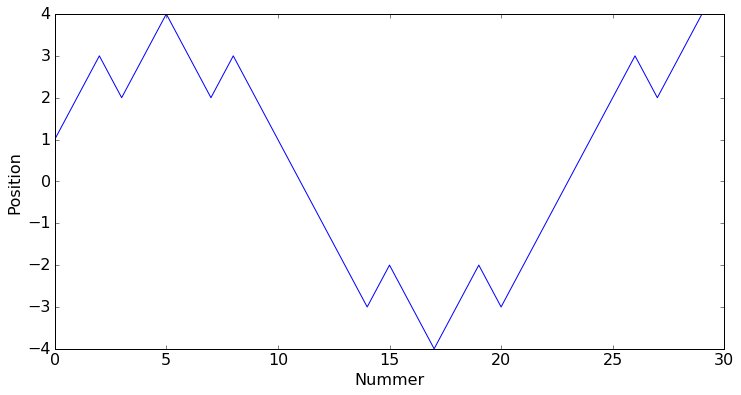

In [26]:
init_plot()
plot(y)
'Spielverlauf ping=3 , pong=4'

#### Abhängigkeit von  Ping- und Pong-Zahlen 

'Spielverlauf ping=3 , pong=5'

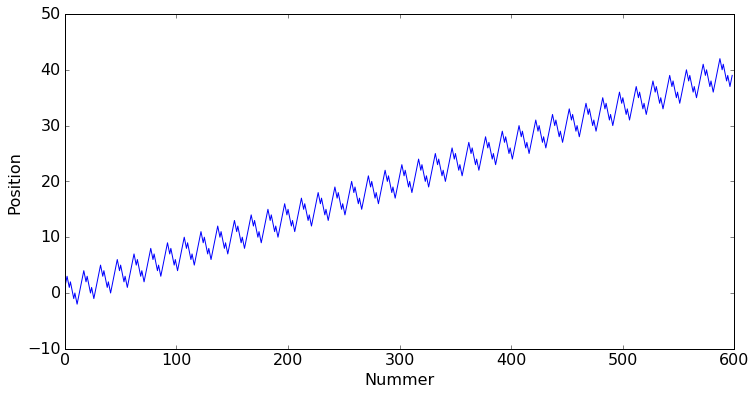

In [28]:
## Abhängigkeit von Ping und Pong
ping = 3
pong = 5
y = [pingpong(n,ping,pong) for n in range(1,600)]
init_plot()
plot(y)
'Spielverlauf ping=%d , pong=%d' %(ping,pong)

### Weitere divergente Konfigurationen

'Spiele (ping=3,pong=5),(ping=3,pong=7),(ping=3,pong=9),(ping=3,pong=11)'

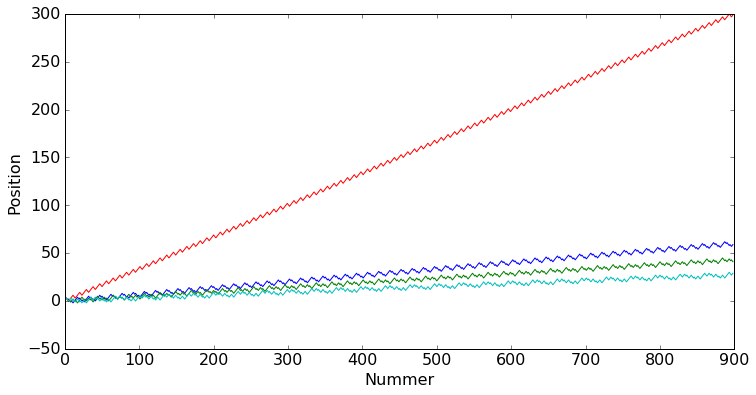

In [9]:
ping = 3
y = [[pingpong(n,ping,pong) for pong in range(5,12,2)] for n in range(1,900) ]
init_plot()
plot(y)
#legend(('ping=3,pong=5','ping=3,pong=7','ping=3,pong=9','ping=3,pong=11'))
'Spiele (ping=3,pong=5),(ping=3,pong=7),(ping=3,pong=9),(ping=3,pong=11)'

## 6 Perioden

'Spielverlauf ping=23 , pong=25'

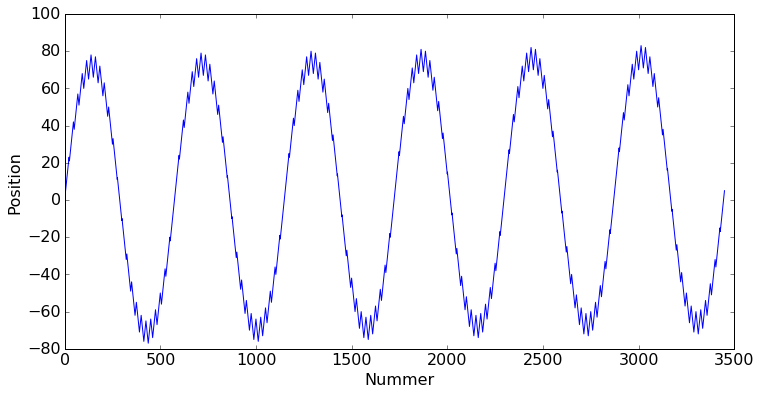

In [10]:
ping=23
pong=25
init_plot()
y = [pingpong(n,ping,pong) for n in range(1,6*ping*pong)]
plot(y)
'Spielverlauf ping=%d , pong=%d' %(ping,pong)

### Ping-Pong Parameter Karte

In [29]:
def plot_maps(zmin,zmax):
    n_col = 4
    n_row = 3
    dn = 50
    figure(figsize=(2.6 * n_col, 2.6 * n_row))
    subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(1,n_row * n_col+1):
        subplot(n_row, n_col, i)
        title(int(i*dn))
        imshow( [[pingpong(i*dn,k,l) for l in range(2,41)] for k in range(2,41)],vmin=zmin,vmax=zmax)
    colorbar()

""

''

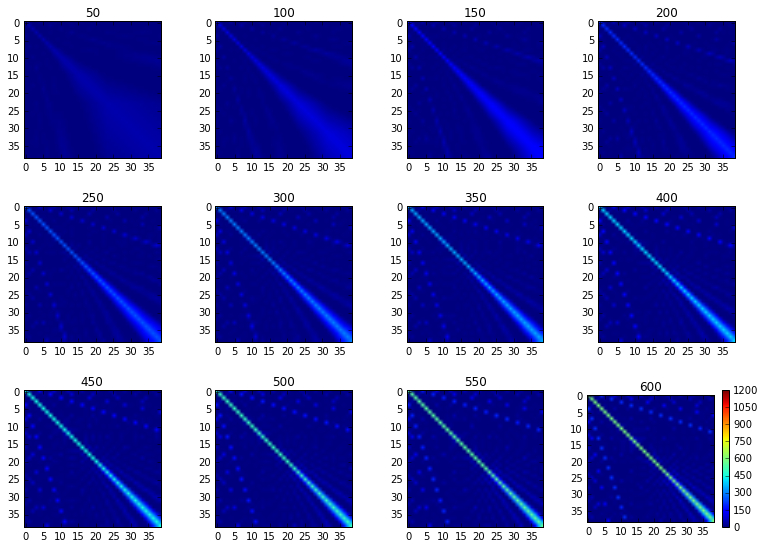

In [12]:
plot_maps(0,1200)

In [13]:
import numpy as np

def plot_map_n_12347(zmin,zmax):
    ymap = [[pingpong(12347,k,l) for l in range(2,41)] for k in range(2,41)]
    fig = figure(figsize=(12, 8))
    xticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
    yticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
    imshow(ymap,interpolation="nearest",vmin=zmin,vmax=zmax);
    colorbar()
    'Parameter Karte ping = 2..40 , pong = 2..40'
    

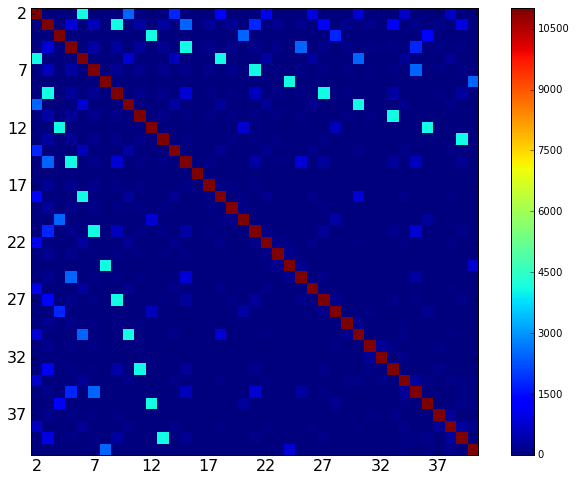

In [14]:
plot_map_n_12347(0,11000)

Die Fälle, wenn ping ein Teiler von pong ist divergieren rasch. 

## Wertebereiche auf -500 .. 500 einschränken 

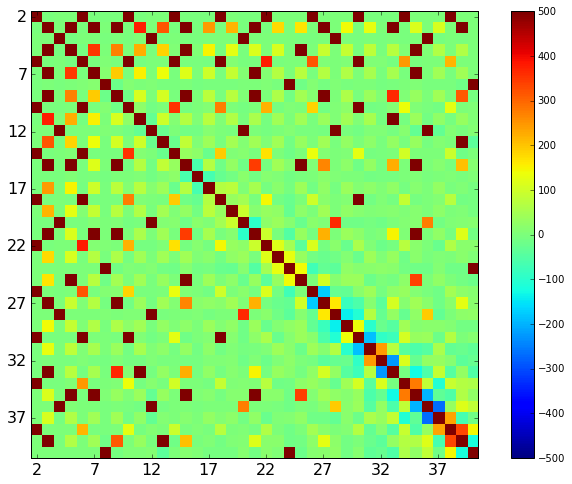

In [15]:
plot_map_n_12347(-500,500)

### Betrachtung spannender Fälle neben der Diagonalen
(39,40) , (39,38) , (39,36) 
(37,40) , (37,38) , (37,36)
(35,40) , (37,38) , (37,36)


'Spielverlauf (35,36) , (35,38) , (35,40) , (37,36) , (37,38) , (37,40), (39,36) , (39,38) , (39,40)'

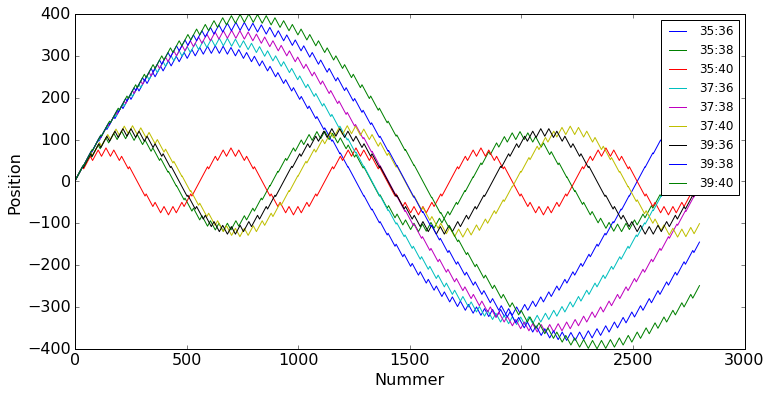

In [16]:
init_plot()
legend((('p33:40', 'p35:40', 'p37:40', 'p39:40')))
y = [[pingpong(n,ping,pong) for ping in range(35,41,2) for pong in range(36,41,2)] for n in range(1,2800) ]
leg= [str(str(ping)+':'+str(pong)) for ping in range(35,41,2) for pong in range(36,41,2)]
plot(y)
legend(tuple(leg))
'Spielverlauf (35,36) , (35,38) , (35,40) , (37,36) , (37,38) , (37,40), (39,36) , (39,38) , (39,40)'

### Kombinationen von ungeraden und geraden teilerfremden Paare scheinen periodisch zu sein

Mit einer Periodizität von $ ping \cdot pong $

Und einer Amplitude von $ \approx \frac{32}{125} \cdot ping \cdot pong $

'Spielverlauf ping=41 , pong=42'

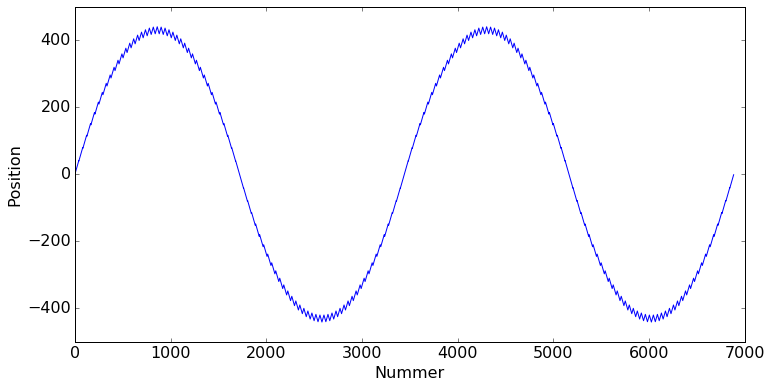

In [17]:
ping = 41
pong = 42 #Torsten
init_plot()
y = [pingpong(n,ping,pong) for n in range(1,4*ping*pong) ]
plot(y)

'Spielverlauf ping=%d , pong=%d' %(ping,pong)



### Vergleich einer normalisierten Ping-Pong Kurve mit einer Sinus Funktion

In [18]:
import numpy as np
from math import pi

def fitPingPong(ping,pong):
    Amplitude = 32.0 / 125 * ping *ping
    x = np.linspace(0,4*pi,4*ping*pong-1)
    y = np.array([pingpong(n,ping,pong)/Amplitude for n in range(1,4*ping*pong) ])
    y2 = np.sin(x)
    return x,y,y2



'Vergleich f(x)=sin(x) und normalisierter Spielverlauf ping=41 , pong=42'

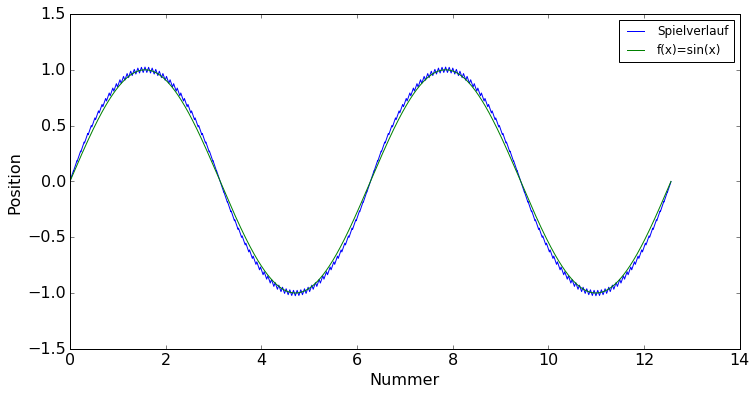

In [19]:
x,y,y2 = fitPingPong(41,42)
init_plot()
plot(x,y,'-',x,y2,'-')
legend(('Spielverlauf','f(x)=sin(x)'))
'Vergleich f(x)=sin(x) und normalisierter Spielverlauf ping=41 , pong=42'

In [20]:
## nur fälle mit ggT = 1
from fractions import gcd
def pingpong2(n, ping=3, pong=4):
    if gcd(ping,pong) != 1:
        return -1
    p = 0
    step = 1
    for i in range(1,n+1):
        p = p + step
        if bool(i%ping)^bool(i%pong):
            step *= (-1)
    return p

'Parameter Karte ping = 2..40 , pong = 2..40'

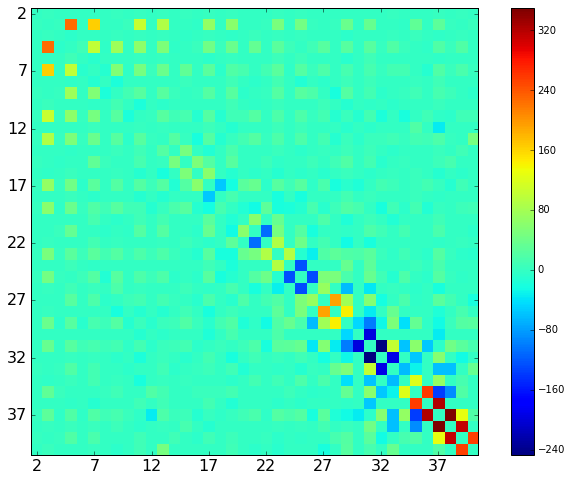

In [21]:
ymap = [[pingpong2(3433,k,l) for l in range(2,41)] for k in range(2,41)]

fig = figure(figsize=(12, 8))
xticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
yticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
imshow(ymap,interpolation="nearest");
colorbar()
'Parameter Karte ping = 2..40 , pong = 2..40'

## die Karte zeigt,  dass es weitere divergente Fälle gibt.

Weitere Untersuchungen zeigen, dass ping,pong Zahlenpaare divergieren, wenn beide Zahlen ungerade sind. Die Betrachtung von ausschliesslich geraden und ungeraden Paaren zeigt. 

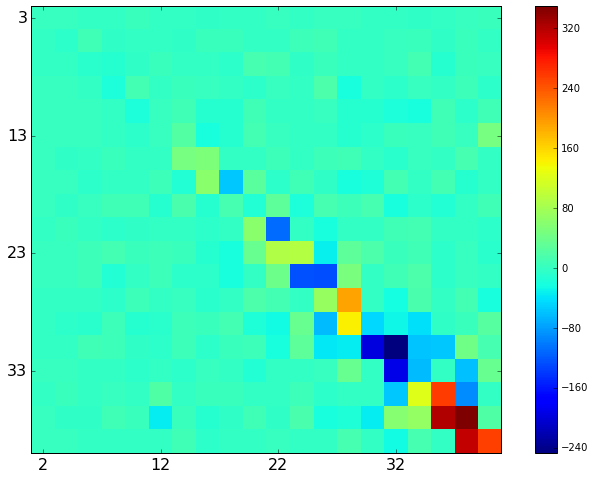

In [22]:
ymap = [[pingpong2(3433,k,l) for l in range(2,41,2)] for k in range(3,41,2)]

fig = figure(figsize=(12, 8))
xticks(np.arange(0,20,5),np.arange(2,40,10),size=16)
yticks(np.arange(0,20,5),np.arange(3,40,10),size=16)

imshow(ymap,interpolation="nearest");
colorbar()

# Vielen Dank !

### Alle Materialien sind auf github

### Dieses und weitere Beispiele können direkt interaktiv erprobt werden.

[https://github.com/mgje/PIUMP](https://github.com/mgje/PIUMP)